In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
import geopandas
import pandas as pd

In [4]:
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g')
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g')
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g')

In [5]:
Comuni2 = comuni[['COMUNE','geometry']]
Comuni2

,COMUNE,geometry
0,AgliÃ¨,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,Airasca,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,Ala di Stura,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,Albiano d'Ivrea,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,Almese,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...
7898,Villaputzu,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,Villasalto,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,Villasimius,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,Villasor,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [6]:
Province2 = province[['DEN_UTS','geometry']]
Province2

,DEN_UTS,geometry
0,Torino,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,Vercelli,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,Novara,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,Cuneo,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,Asti,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...
102,Verbano-Cusio-Ossola,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,Monza e della Brianza,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,Fermo,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,Barletta-Andria-Trani,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [7]:
ComuniProvince = geopandas.sjoin(Comuni2,Province2,op='within', how='left') #la geometria del df è dei comuni
ComuniProvince

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,COMUNE,geometry,index_right,DEN_UTS
0,AgliÃ¨,"POLYGON ((404703.558 5026682.655, 405359.554 5...",0,Torino
1,Airasca,"POLYGON ((380700.909 4977305.520, 381105.998 4...",0,Torino
2,Ala di Stura,"POLYGON ((364710.857 5022090.678, 364737.794 5...",0,Torino
3,Albiano d'Ivrea,"POLYGON ((415942.504 5033304.609, 416079.315 5...",0,Torino
4,Almese,"POLYGON ((376934.962 4999073.854, 376960.555 4...",0,Torino
...,...,...,...,...
7898,Villaputzu,"MULTIPOLYGON (((556602.772 4375162.650, 556598...",106,Sud Sardegna
7899,Villasalto,"POLYGON ((541186.146 4375105.653, 541180.146 4...",106,Sud Sardegna
7900,Villasimius,"MULTIPOLYGON (((546451.098 4325900.553, 546443...",106,Sud Sardegna
7901,Villasor,"POLYGON ((500362.475 4361229.767, 500397.474 4...",106,Sud Sardegna


In [8]:
Regioni2 = regioni[['DEN_REG','geometry']]
Regioni2

,DEN_REG,geometry
0,Piemonte,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,Valle d'Aosta,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,Lombardia,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,Trentino-Alto Adige,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,Veneto,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,Friuli Venezia Giulia,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,Liguria,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,Emilia-Romagna,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,Toscana,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,Umbria,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


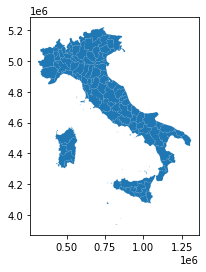

In [9]:
Reg_Prov = geopandas.sjoin(Province2, Regioni2, op='within', how='left') #non funziona con right e con outer
Reg_Prov.plot()

In [10]:
NProvince = Reg_Prov.groupby('DEN_REG')[['DEN_UTS']].count().reset_index()
NProvince

,DEN_REG,DEN_UTS
0,Abruzzo,4
1,Basilicata,2
2,Calabria,5
3,Campania,5
4,Emilia-Romagna,9
5,Friuli Venezia Giulia,4
6,Lazio,5
7,Liguria,4
8,Lombardia,12
9,Marche,5


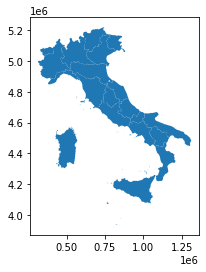

In [11]:
Regioni2.plot()

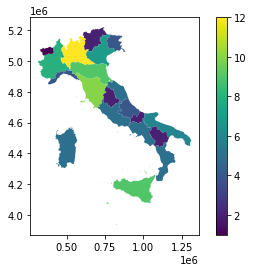

In [12]:
Regioni_Province = pd.merge(Regioni2, NProvince, how='left', on='DEN_REG')
Regioni_Province.plot(legend=True, column='DEN_UTS')

il merge si può usare tra un geodataframe e un dataframe, il join si può usare solo tra 2 geodataframe

In [ ]:
!pip install contextily
import contextily as ctx

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


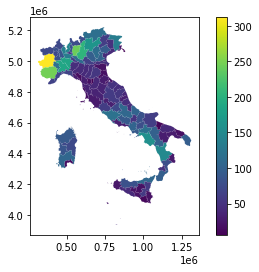

In [19]:
#trova per ogni comune la provincia in cui si trova quel comune
#effettuando una join spaziale:prende la geometria del comune
#e cerca in quale geometria della provincia si trova.
#restituisce un geodataframe
Com_Prov = geopandas.sjoin(Comuni2,Province2, op= 'within', how='left')

#raggruppa i comuni di ogni provincia e li conta
#restituisce un dataframe
NComuni = Com_Prov.groupby('DEN_UTS')['COMUNE'].count().reset_index()

#unisce il geodataframe delle province con il dataframe che contiene il numero 
#di comuni per ogni provincia.
#restituisce un geodataframe che è uguale a Province2 ma con una colonna 
#in più che è il numero di comuni per ogni provincia.
Comuni_Province = pd.merge(Province2, NComuni, on='DEN_UTS', how='left' )

#Visualizza le province colorate in base al numero di comuni (column='COMUNE')
Comuni_Province.plot(legend=True, column='COMUNE')






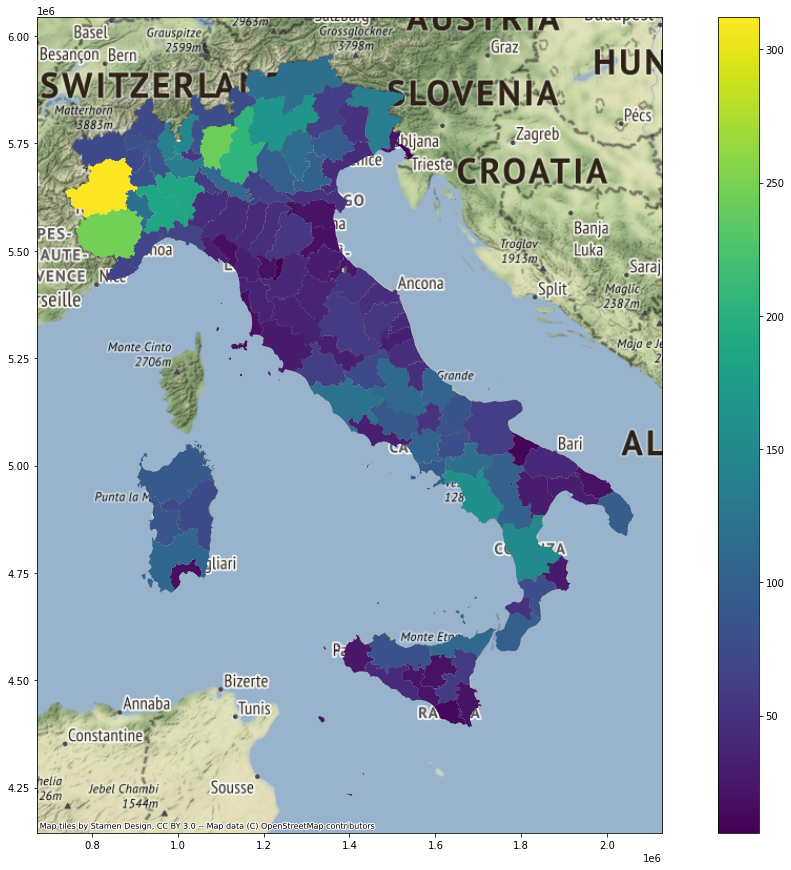

In [16]:
ax = Comuni_Province.to_crs(epsg=3857).plot(figsize= (20,15), linewidth=3, legend=True, column='COMUNE')
ctx.add_basemap(ax)